In [1]:
from pycaret.regression import setup, compare_models, evaluate_model, predict_model, save_model, load_model, plot_model, get_config, interpret_model

In [2]:
import pandas as pd
weather = pd.read_csv("C:/Users/nasut/OneDrive/Documents/Kuliah/Semester 7/PKKM/BMKG/Project/Data/data_fix_temp.txt")

In [3]:
weather.head()

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
1,2021-02-27 15:00:00,96001,0.0,0.0,0,27.3973,21.6059,70.8014,3.43326,12.4580,...,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
2,2021-02-27 18:00:00,96001,0.0,0.0,0,27.0090,21.5161,72.0376,3.04901,27.2450,...,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
3,2021-02-27 21:00:00,96001,0.0,0.0,0,26.5672,21.4226,73.5149,2.04556,37.3569,...,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
4,2021-02-28 00:00:00,96001,0.0,0.0,0,26.4519,21.5400,74.5507,2.22508,20.1816,...,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
5,2021-02-28 03:00:00,96001,0.0,0.0,0,26.7230,21.3691,72.6038,2.34268,14.7934,...,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4


In [4]:
weather.columns

Index(['Date', 'lokasi', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.',
       'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.', 'wdir.deg.',
       'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.',
       'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.',
       'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.',
       't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.',
       'rh500...', 'ws500.m.s.', 'wd500.deg.', 'hari', 'UTC', 'LAT', 'LON',
       'ELEV', 't_obs'],
      dtype='object')

In [5]:
weather.dtypes

Date             object
lokasi            int64
con_prec.mm.    float64
mic_prec.mm.    float64
sha_prec.mm.      int64
suhu2m.degC.    float64
dew2m.degC.     float64
rh2m...         float64
wspeed.m.s.     float64
wdir.deg.       float64
lcloud...       float64
mcloud...       float64
hcloud...       float64
surpre.Pa.      float64
clmix.kg.kg.    float64
wamix.kg.kg.    float64
outlr.W.m2.     float64
pblh.m.         float64
lifcl.m.        float64
cape.j.kg.      float64
mdbz            float64
t950.degC.      float64
rh950...        float64
ws950.m.s.      float64
wd950.deg.      float64
t800.degC.      float64
rh800...        float64
ws800.m.s.      float64
wd800.deg.      float64
t500.degC.      float64
rh500...        float64
ws500.m.s.      float64
wd500.deg.      float64
hari              int64
UTC               int64
LAT             float64
LON             float64
ELEV              int64
t_obs           float64
dtype: object

In [6]:
weather.agg(['nunique']).T

,nunique
Date,3886
lokasi,169
con_prec.mm.,304525
mic_prec.mm.,205022
sha_prec.mm.,1
suhu2m.degC.,122496
dew2m.degC.,90837
rh2m...,291107
wspeed.m.s.,369201
wdir.deg.,321537


In [7]:
weather_dropped = weather.drop(columns=['hari', 'UTC', 'LAT', 'LON','hari'])

In [8]:
setup??

Signature:
setup(
    data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    data_func: Union[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]], NoneType] = None,
    target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1,
    index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True,
    train_size: float = 0.7,
    test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None,
    ordinal_features: Union[Dict[str, list], NoneType] = None,
    numeric_features: Union[List[str], NoneType] = None,
    categorical_features: Union[List[str], NoneType] = None,
    date_features: Union[List[str], NoneType] = None,
    text_features: Union[List[str], NoneType] = None,
    ignore_features: Union[List[str], NoneType] = None,
    keep_featu

In [9]:
s = setup(weather_dropped, target='t_obs', train_size=0.9, n_jobs=5, use_gpu=True, normalize = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

,Description,Value
0,Session id,2482
1,Target,t_obs
2,Target type,Regression
3,Original data shape,"(544274, 35)"
4,Transformed data shape,"(544274, 35)"
5,Transformed train set shape,"(489846, 35)"
6,Transformed test set shape,"(54428, 35)"
7,Numeric features,33
8,Categorical features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

In [10]:
compare_models??

Signature:
compare_models(
    include: Union[List[Union[str, Any]], NoneType] = None,
    exclude: Union[List[str], NoneType] = None,
    fold: Union[int, Any, NoneType] = None,
    round: int = 4,
    cross_validation: bool = True,
    sort: str = 'R2',
    n_select: int = 1,
    budget_time: Union[float, NoneType] = None,
    turbo: bool = True,
    errors: str = 'ignore',
    fit_kwargs: Union[dict, NoneType] = None,
    groups: Union[str, Any, NoneType] = None,
    experiment_custom_tags: Union[Dict[str, Any], NoneType] = None,
    engine: Union[Dict[str, str], NoneType] = None,
    verbose: bool = True,
    parallel: Union[pycaret.internal.parallel.parallel_backend.ParallelBackend, NoneType] = None,
)
Source:   
@check_if_global_is_not_none(globals(), _CURRENT_EXPERIMENT_DECORATOR_DICT)
def compare_models(
    include: Optional[List[Union[str, Any]]] = None,
    exclude: Optional[List[str]] = None,
    fold: Optional[Union[int, Any]] = None,
    round: int = 4,
    cross_validati

In [11]:
from pycaret.regression import models
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: gfx1103, Vendor: Advanced Micro Devices, Inc.
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [12]:
best_model = compare_models(sort='R2', include=['catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.9379,1.5838,1.2585,0.8369,0.0446,0.0348,9.3950


In [13]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [14]:
train_data = get_config(variable='X_train')
test_data = get_config(variable='X_test')

In [15]:
train_data

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
451892,2022-12-03 09:00:00,97460,0.346763,1.021820e-03,0,23.824699,23.093000,95.828697,0.495724,283.842010,...,282.544006,15.4419,86.817802,1.16348,270.346985,-4.34946,57.695099,1.90513,78.663399,14
38793,2021-09-15 21:00:00,96073,0.010227,0.000000e+00,0,22.863501,20.231899,85.265503,0.920424,59.953999,...,193.417999,14.9985,81.225098,2.74562,123.700996,-5.92212,69.943901,5.00357,230.800003,10
208074,2021-10-28 09:00:00,96687,15.639900,1.582300e+01,0,26.849100,25.081301,90.178101,1.320610,142.988007,...,112.500000,15.5978,89.218498,2.12173,70.991302,-4.87068,55.817699,11.27470,88.422501,55
333642,2021-10-24 15:00:00,97048,0.000000,0.000000e+00,0,22.139500,21.858000,98.461502,0.545301,34.380600,...,70.951500,15.8875,62.051601,2.82621,141.343994,-5.54245,56.242001,8.57931,87.861504,33
210173,2021-07-03 09:00:00,96695,1.076010,1.311300e-04,0,26.538799,24.226900,87.272598,2.090810,180.557999,...,159.367004,14.8721,87.257698,3.78692,121.442001,-5.00084,55.380501,4.65358,96.510201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103436,2022-07-14 06:00:00,96221,0.317005,0.000000e+00,0,30.876900,24.034800,67.059799,0.940699,113.874001,...,116.361000,15.5863,86.152298,2.04058,93.595200,-5.43711,85.404198,1.94850,100.679001,10
241728,2022-11-19 06:00:00,96753,0.033008,0.000000e+00,0,31.046700,22.138000,59.217499,8.051070,276.204010,...,270.868988,15.5535,74.485100,9.46292,264.596008,-4.52188,36.499699,14.83090,269.368988,207
412920,2022-12-24 15:00:00,97284,0.881282,8.254290e+00,0,18.235701,18.205500,100.000000,4.755310,250.595001,...,250.494003,13.9230,100.000000,15.71350,254.912994,-3.87052,93.788902,5.09005,346.204010,1070
367,2021-05-09 06:00:00,96001,0.000000,1.695650e-21,0,28.796700,25.242300,81.249496,2.640100,16.193701,...,31.288000,17.2400,69.128304,3.25093,137.852005,-4.07989,37.001701,4.72397,245.759003,126


In [16]:
get_config(variable='X_train_transformed')

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
451892,0.389140,0.977663,-0.162072,-0.089980,0.0,-0.838820,0.176033,1.194617,-1.221010,1.037561,...,1.051890,0.029119,0.561072,-1.179300,0.953919,0.929734,-0.447189,-1.253663,-0.752707,-0.328979
38793,-1.255511,-1.378530,-0.357922,-0.090539,0.0,-1.172604,-1.182091,0.277730,-0.973659,-1.233404,...,0.119366,-0.530048,0.154302,-0.651105,-0.614949,-1.164533,0.105411,-0.125959,0.985073,-0.343862
208074,0.626542,-0.335486,8.737920,8.571970,0.0,0.211428,1.119850,0.704144,-0.740585,-0.391164,...,-0.727278,0.225722,0.735680,-0.859390,-1.178855,0.235640,-0.531888,2.156473,-0.641234,-0.176432
333642,-0.612627,0.277770,-0.363874,-0.090539,0.0,-1.424020,-0.410204,1.423145,-1.192136,-1.492802,...,-1.161999,0.591059,-1.240231,-0.624200,-0.426199,-0.658937,-0.512745,1.175463,-0.647642,-0.258287
210173,0.597109,-0.321896,0.262321,-0.090467,0.0,0.103674,0.714278,0.451946,-0.292010,-0.010080,...,-0.236909,-0.689450,0.593066,-0.303469,-0.639117,0.062309,-0.551612,-0.253340,-0.548852,-0.373627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103436,1.027096,-1.127113,-0.179390,-0.090539,0.0,1.610115,0.623091,-1.302528,-0.961850,-0.686476,...,-0.686880,0.211219,0.512668,-0.886481,-0.937031,-0.518659,0.802897,-1.237878,-0.501234,-0.343862
241728,0.881368,-0.223367,-0.344665,-0.090539,0.0,1.669079,-0.277292,-1.983241,3.179327,0.960087,...,0.929734,0.169856,-0.335914,1.591452,0.892393,0.700127,-1.403413,3.450783,1.425627,0.389110
412920,-0.763751,0.678680,0.148997,4.428380,0.0,-2.779646,-2.143994,1.556687,1.259831,0.700327,...,0.716551,-1.886348,1.519843,3.678196,0.788801,1.567525,1.181171,-0.094483,2.303275,3.600050
367,1.429897,-1.500842,-0.363874,-0.090539,0.0,0.887748,1.196274,-0.070860,0.027904,-1.677278,...,-1.576998,2.296680,-0.725526,-0.482408,-0.463557,1.288713,-1.380765,-0.227722,1.155942,0.087736


In [17]:
test_data

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
314127,2021-12-28 21:00:00,97008,0.006103,0.000000e+00,0,24.133101,23.242100,94.919296,3.34681,23.641399,...,25.741400,14.6076,78.296097,7.26075,63.597198,-5.52271,52.512600,7.58071,94.699303,6
20717,2021-11-09 00:00:00,96033,0.000564,0.000000e+00,0,25.158001,21.356701,79.600502,2.95131,276.122009,...,257.402008,15.3284,88.491798,2.35526,286.158997,-5.07975,74.961800,11.36550,107.867996,3
108105,2021-10-07 03:00:00,96237,0.659198,0.000000e+00,0,28.245001,24.397800,79.776299,4.56644,187.436005,...,186.675995,15.1904,88.206902,4.47766,198.891006,-4.99893,68.164703,5.31117,121.577003,0
223526,2021-04-13 00:00:00,96741,0.000000,0.000000e+00,0,26.324200,24.063000,87.521500,2.14418,155.554993,...,242.904007,14.8402,77.055199,2.03061,213.259003,-5.69066,86.175797,3.74300,85.027100,3
103774,2022-10-14 00:00:00,96221,0.109304,3.095170e-12,0,24.438700,23.476601,94.522003,1.12289,201.162994,...,158.820007,14.4183,96.453400,3.74757,254.938995,-5.41944,86.071899,3.48317,259.571014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345400,2023-03-25 06:00:00,97086,0.000000,7.024780e-04,0,27.688200,25.261801,86.771202,4.95106,91.120399,...,64.644600,15.7297,88.230698,3.77451,14.780400,-4.32703,58.423000,5.87565,94.170898,19
397370,2021-11-11 03:00:00,97242,2.531610,3.464100e-03,0,27.884800,24.784700,83.376099,3.66999,154.619995,...,157.835999,15.5121,92.034103,3.55128,132.953003,-4.04807,69.655502,5.45464,73.149902,55
543025,2021-12-28 09:00:00,99992,0.862529,1.327990e-06,0,29.156500,23.722500,72.658699,3.66255,324.743988,...,316.639008,15.5475,81.446503,3.38130,276.855988,-4.82507,67.904800,4.70967,285.247009,41
410641,2021-04-07 09:00:00,97284,0.261121,1.713880e-03,0,20.296900,19.757299,96.887802,2.09213,288.298004,...,289.306000,15.5891,88.828400,6.51082,246.998993,-3.22561,65.484001,7.30347,9.626790,1070


In [18]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.9327,1.5491,1.2446,0.8412,0.0442,0.0346


,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,t_obs,prediction_label
314127,2021-12-28 21:00:00,97008,0.006103,0.000000e+00,0,24.133101,23.242100,94.919296,3.34681,23.641399,...,78.296097,7.26075,63.597198,-5.52271,52.512600,7.58071,94.699303,6,23.200001,25.338185
20717,2021-11-09 00:00:00,96033,0.000564,0.000000e+00,0,25.158001,21.356701,79.600502,2.95131,276.122009,...,88.491798,2.35526,286.158997,-5.07975,74.961800,11.36550,107.867996,3,25.600000,26.186258
108105,2021-10-07 03:00:00,96237,0.659198,0.000000e+00,0,28.245001,24.397800,79.776299,4.56644,187.436005,...,88.206902,4.47766,198.891006,-4.99893,68.164703,5.31117,121.577003,0,30.100000,28.739632
223526,2021-04-13 00:00:00,96741,0.000000,0.000000e+00,0,26.324200,24.063000,87.521500,2.14418,155.554993,...,77.055199,2.03061,213.259003,-5.69066,86.175797,3.74300,85.027100,3,26.000000,26.836478
103774,2022-10-14 00:00:00,96221,0.109304,3.095170e-12,0,24.438700,23.476601,94.522003,1.12289,201.162994,...,96.453400,3.74757,254.938995,-5.41944,86.071899,3.48317,259.571014,10,24.600000,25.421300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345400,2023-03-25 06:00:00,97086,0.000000,7.024780e-04,0,27.688200,25.261801,86.771202,4.95106,91.120399,...,88.230698,3.77451,14.780400,-4.32703,58.423000,5.87565,94.170898,19,31.799999,30.773291
397370,2021-11-11 03:00:00,97242,2.531610,3.464100e-03,0,27.884800,24.784700,83.376099,3.66999,154.619995,...,92.034103,3.55128,132.953003,-4.04807,69.655502,5.45464,73.149902,55,32.200001,28.443015
543025,2021-12-28 09:00:00,99992,0.862529,1.327990e-06,0,29.156500,23.722500,72.658699,3.66255,324.743988,...,81.446503,3.38130,276.855988,-4.82507,67.904800,4.70967,285.247009,41,29.400000,30.329081
410641,2021-04-07 09:00:00,97284,0.261121,1.713880e-03,0,20.296900,19.757299,96.887802,2.09213,288.298004,...,88.828400,6.51082,246.998993,-3.22561,65.484001,7.30347,9.626790,1070,20.000000,21.777692


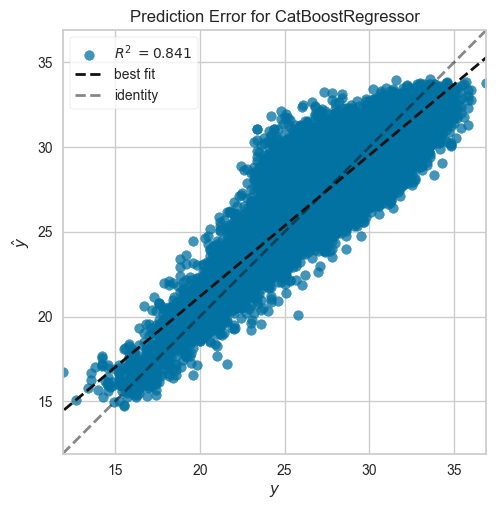

In [19]:
plot_model(best_model, plot='error')

In [20]:
best_model.get_params

<bound method CatBoost.get_params of <catboost.core.CatBoostRegressor object at 0x000002C68F83C970>>

In [21]:
from pycaret.regression import tune_model
best_model_tuned = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9411,1.5986,1.2644,0.8354,0.0450,0.0350
1,0.9387,1.6026,1.2659,0.8329,0.0448,0.0348
2,0.9362,1.5813,1.2575,0.8353,0.0446,0.0347
3,0.9326,1.5703,1.2531,0.8371,0.0445,0.0346
4,0.9351,1.5638,1.2505,0.8412,0.0444,0.0347
5,0.9416,1.5971,1.2638,0.8374,0.0448,0.0349
6,0.9436,1.6098,1.2688,0.8349,0.0450,0.0350
7,0.9371,1.5793,1.2567,0.8385,0.0446,0.0347
8,0.9413,1.5898,1.2609,0.8358,0.0447,0.0349


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
predict_model(best_model_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.9327,1.5491,1.2446,0.8412,0.0442,0.0346


,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,t_obs,prediction_label
314127,2021-12-28 21:00:00,97008,0.006103,0.000000e+00,0,24.133101,23.242100,94.919296,3.34681,23.641399,...,78.296097,7.26075,63.597198,-5.52271,52.512600,7.58071,94.699303,6,23.200001,25.338185
20717,2021-11-09 00:00:00,96033,0.000564,0.000000e+00,0,25.158001,21.356701,79.600502,2.95131,276.122009,...,88.491798,2.35526,286.158997,-5.07975,74.961800,11.36550,107.867996,3,25.600000,26.186258
108105,2021-10-07 03:00:00,96237,0.659198,0.000000e+00,0,28.245001,24.397800,79.776299,4.56644,187.436005,...,88.206902,4.47766,198.891006,-4.99893,68.164703,5.31117,121.577003,0,30.100000,28.739632
223526,2021-04-13 00:00:00,96741,0.000000,0.000000e+00,0,26.324200,24.063000,87.521500,2.14418,155.554993,...,77.055199,2.03061,213.259003,-5.69066,86.175797,3.74300,85.027100,3,26.000000,26.836478
103774,2022-10-14 00:00:00,96221,0.109304,3.095170e-12,0,24.438700,23.476601,94.522003,1.12289,201.162994,...,96.453400,3.74757,254.938995,-5.41944,86.071899,3.48317,259.571014,10,24.600000,25.421300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345400,2023-03-25 06:00:00,97086,0.000000,7.024780e-04,0,27.688200,25.261801,86.771202,4.95106,91.120399,...,88.230698,3.77451,14.780400,-4.32703,58.423000,5.87565,94.170898,19,31.799999,30.773291
397370,2021-11-11 03:00:00,97242,2.531610,3.464100e-03,0,27.884800,24.784700,83.376099,3.66999,154.619995,...,92.034103,3.55128,132.953003,-4.04807,69.655502,5.45464,73.149902,55,32.200001,28.443015
543025,2021-12-28 09:00:00,99992,0.862529,1.327990e-06,0,29.156500,23.722500,72.658699,3.66255,324.743988,...,81.446503,3.38130,276.855988,-4.82507,67.904800,4.70967,285.247009,41,29.400000,30.329081
410641,2021-04-07 09:00:00,97284,0.261121,1.713880e-03,0,20.296900,19.757299,96.887802,2.09213,288.298004,...,88.828400,6.51082,246.998993,-3.22561,65.484001,7.30347,9.626790,1070,20.000000,21.777692


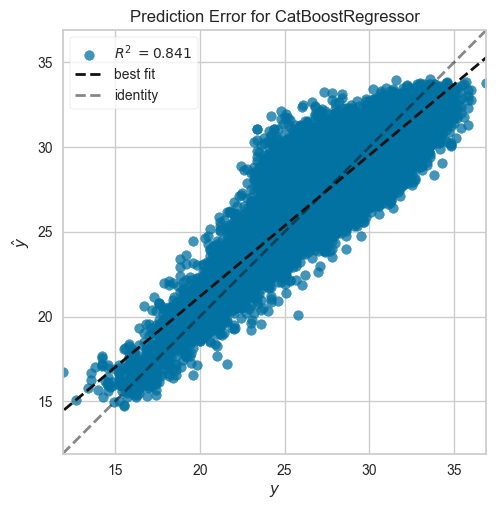

In [23]:
plot_model(best_model_tuned, plot='error')

In [24]:
best_model_tuned.get_params

<bound method CatBoost.get_params of <catboost.core.CatBoostRegressor object at 0x000002C68E037340>>

In [27]:
plot_model(best_model_tuned, plot='parameter')

,Parameters
nan_mode,Min
gpu_ram_part,0.95
eval_metric,RMSE
iterations,1000
leaf_estimation_method,Newton
observations_to_bootstrap,TestOnly
random_score_type,NormalWithModelSizeDecrease
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain


In [27]:
save_model(best_model, 'xgboost_tuned_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['lokasi', 'con_prec.mm.',
                                              'mic_prec.mm.', 'sha_prec.mm.',
                                              'suhu2m.degC.', 'dew2m.degC.',
                                              'rh2m...', 'wspeed.m.s.',
                                              'wdir.deg.', 'lcloud...',
                                              'mcloud...', 'hcloud...',
                                              'surpre.Pa.', 'clmix.kg.kg.',
                                              'wamix.kg.kg.', 'outlr.W.m2.',
                                              'pblh.m.', 'lifcl.m.',
                                              'cape.j.kg.', 'mdbz', 't9...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_cons